### UCI 

In [7]:
import pandas as pd
import numpy as np
import os
import plotly.express as px

# Define and create paths


In [8]:
#get working directory
current_dir = os.getcwd()
#go on directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
#define paths to the folders
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join (data_dir, 'raw')
processed_dir = os.path.join (data_dir, 'processed')
#define paths to results folder
results_dir = os.path.join (project_root_dir, 'results')
#define paths to doc folder
docs_dir = os.path.join (project_root_dir, 'docs')

#create directory if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

In [9]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv") 
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_level,native_region,age_group
0,39,governement,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,high school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


# Check the shape of the dataset and datatype

In [10]:
adult_df.shape

(32513, 16)

In [11]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32513 non-null  int64 
 1   workclass         32513 non-null  object
 2   fnlwgt            32513 non-null  int64 
 3   education_num     32513 non-null  int64 
 4   marital_status    32513 non-null  object
 5   relationship      32513 non-null  object
 6   race              32513 non-null  object
 7   sex               32513 non-null  object
 8   capital_gain      32513 non-null  int64 
 9   capital_loss      32513 non-null  int64 
 10  hours_per_week    32513 non-null  int64 
 11  income            32513 non-null  object
 12  education_level   25021 non-null  object
 13  occupation_level  32513 non-null  object
 14  native_region     31932 non-null  object
 15  age_group         32513 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


# Summary statstics
## Numerical variables

In [12]:
adult_df.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_level,native_region,age_group
count,32513,32513,32513,32513,32513,32513,25021,32513,31932,32513
unique,6,5,5,5,2,2,5,6,5,7
top,private,married,male spouse,white,male,<=50k,high school graduate,white collar,north america,26-35
freq,22650,14961,13178,27771,21758,24677,10484,16532,30018,8501


In [14]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

In [15]:
adult_df

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_level,native_region,age_group
0,39,governement,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32508,27,private,257302,12,married,female spouse,white,female,0,0,38,<=50k,associate,white collar,north america,26-35
32509,40,private,154374,9,married,male spouse,white,male,0,0,40,>50k,high school graduate,blue collar,north america,36-45
32510,58,private,151910,9,widowed,single,white,female,0,0,40,<=50k,high school graduate,white collar,north america,46-60
32511,22,private,201490,9,single,child,white,male,0,0,20,<=50k,high school graduate,white collar,north america,18-25


In [16]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460154
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
married-af-spouse        0.000707
Name: proportion, dtype: float64

In [17]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [18]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income distribution

In [19]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


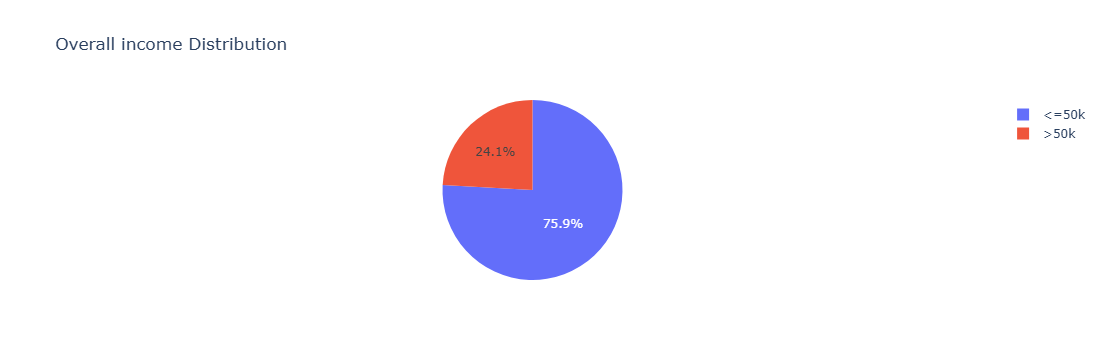

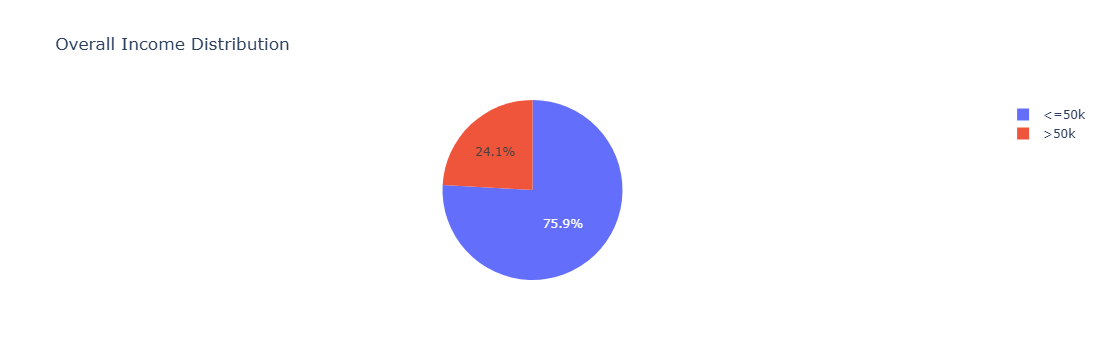

In [112]:
fig = px.pie(
    adult_df_income,
    names='income',
    values='total',
    title='Overall income Distribution',
    color_discrete_sequence=['#636EFA', '#EF553B']  # example: blue and red
)
fig.show()
fig = px.pie(adult_df_income, names='income' , values='total', title='Overall Income Distribution',color_discrete_sequence=['#636EFA', '#EF553B'])
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_pie_chart.html'))


In [21]:
adult_df_income_age= adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age')
adult_df_income_age


,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [22]:
total_per_group = adult_df_income_age.groupby('age_group').size()
total_per_group

age_group
18-25    2
26-35    2
36-45    2
46-60    2
61-75    2
76+      2
<18      1
dtype: int64

In [23]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


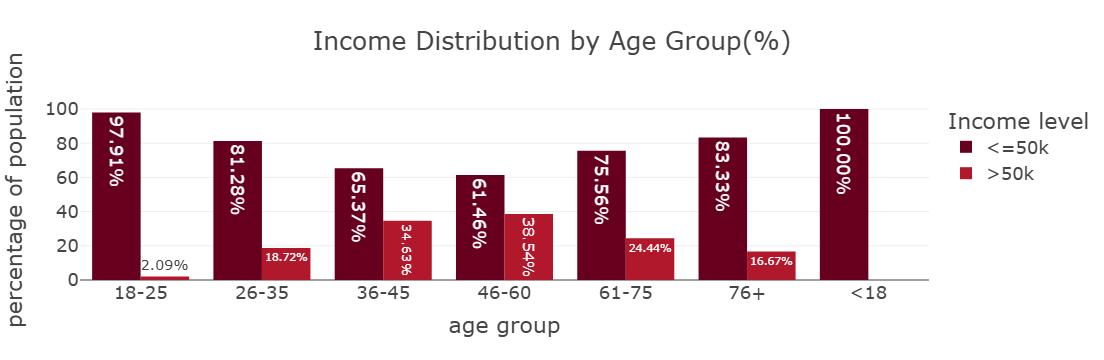

In [125]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Age Group(%)',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(
    template='presentation',
    xaxis_title='age group',
    yaxis_title='percentage of population',
    legend_title=dict(text='Income level'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_age_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_age_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_age_bar_chart.html'))



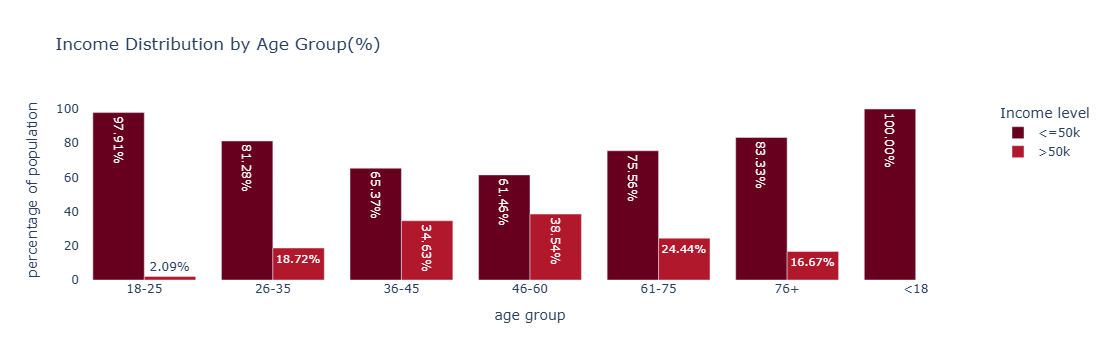

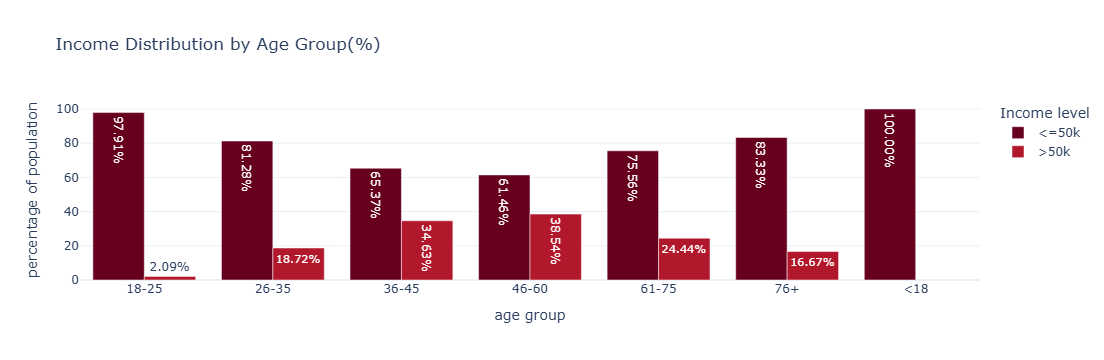

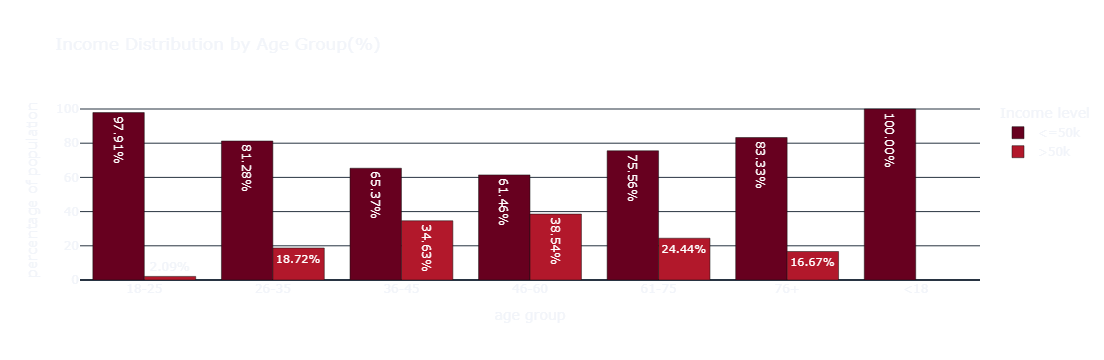

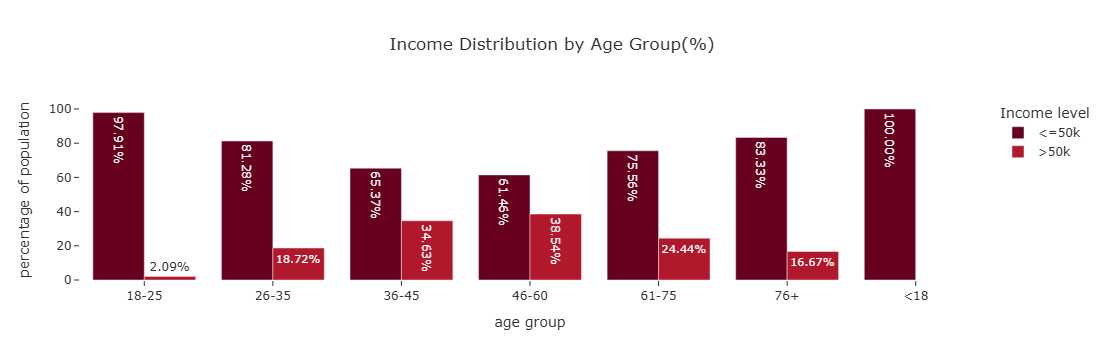

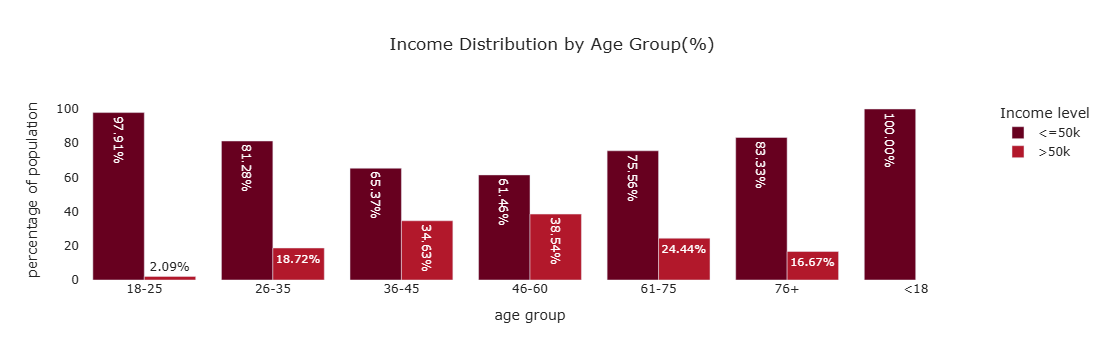

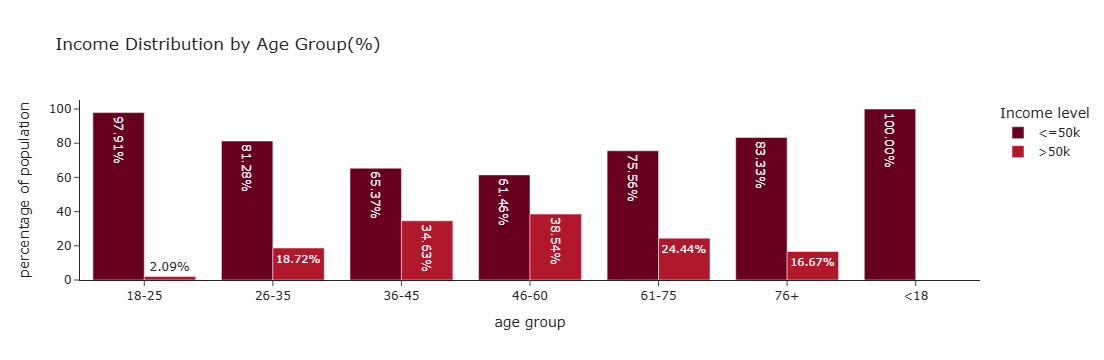

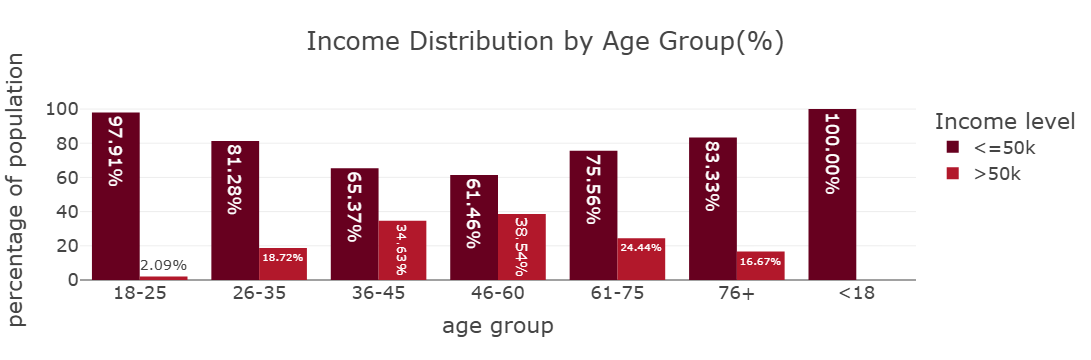

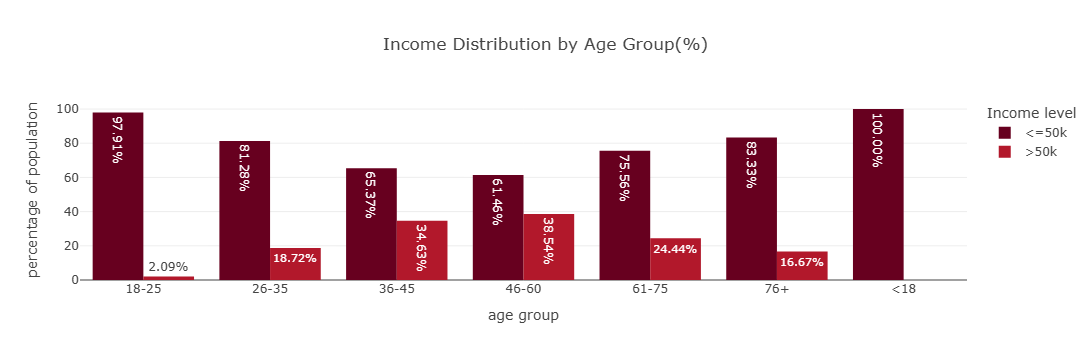

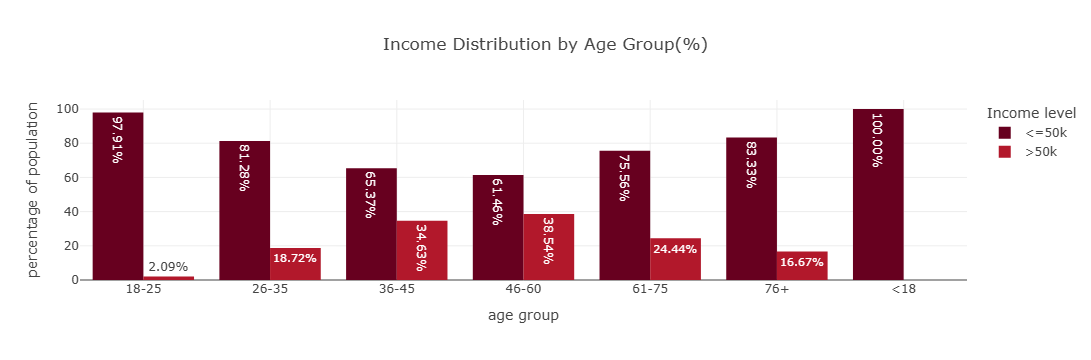

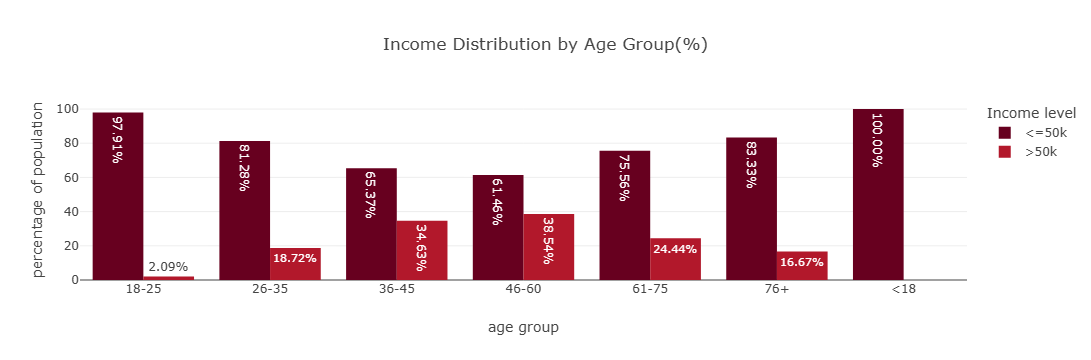

In [126]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation", "xgridoff", "gridon", "none"]

for theme in themes:
    fig.update_layout(template=theme)
    fig.show()

# Income by Native Region

In [118]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22768,75.847825
7,north america,>50k,7250,24.152175
8,south america,<=50k,174,87.878788
9,south america,>50k,24,12.121212


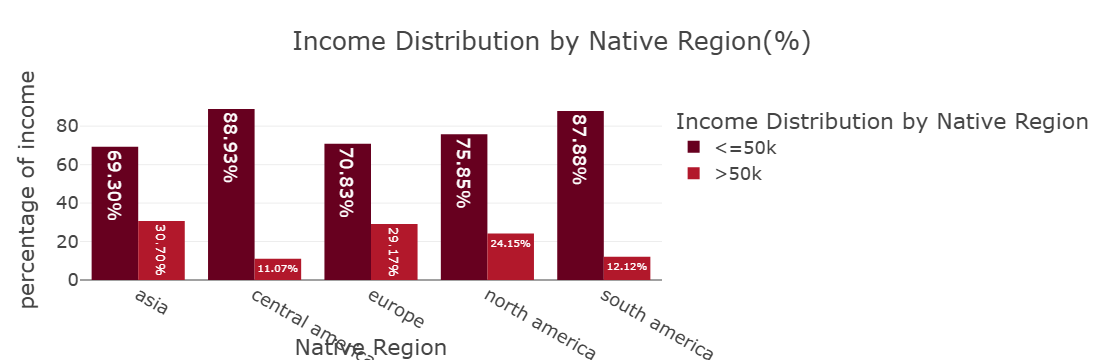

In [120]:
fig = px.bar(
    adult_df_income_native_region,
    x = 'native_region',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Native Region(%)',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(
    template='presentation',
    xaxis_title='Native Region',
    yaxis_title='percentage of income',
    legend_title=dict(text='Income Distribution by Native Region'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()
fig.write_image(os.path.join(results_dir, 'income_native_region_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_native_region_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_native_region_bar_chart.html'))



In [69]:
# First, calculate total per race
total_per_race = adult_df_income_race.groupby('race')['total_by_race'].transform('sum')

# Then, calculate the percentage for each income level within each race
adult_df_income_race['percentage'] = (adult_df_income_race['total_by_race'] / total_per_race) * 100

# Show the result
adult_df_income_race


,race,income,total_by_race,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


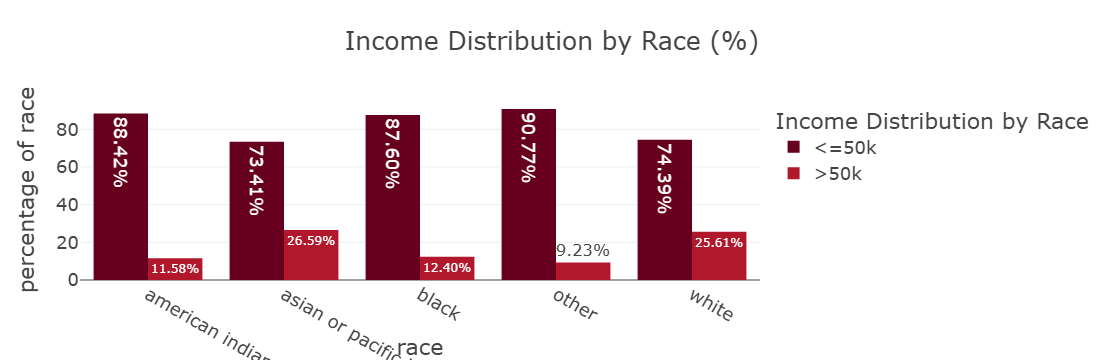

In [128]:

fig = px.bar(
    adult_df_income_race,
    x = 'race',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Race (%)',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(
    template='presentation',
    xaxis_title='race',
    yaxis_title='percentage of race ',
    legend_title=dict(text='Income Distribution by Race'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_race_bar_chart.html'))


In [77]:
adult_df_income_edu_occ = adult_df.groupby(['education_level','occupation_level','income']).size().reset_index(name='total').sort_values('total', ascending=False)
adult_df_income_edu_occ 


,education_level,occupation_level,income,total
10,high school graduate,blue collar,<=50k,3976
52,tertiary,white collar,>50k,3545
51,tertiary,white collar,<=50k,3369
19,high school graduate,white collar,<=50k,2900
30,secondary,blue collar,<=50k,1349
15,high school graduate,service,<=50k,1276
8,associate,white collar,<=50k,1015
11,high school graduate,blue collar,>50k,796
20,high school graduate,white collar,>50k,731
35,secondary,service,<=50k,642


In [78]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + ' | ' + adult_df_income_edu_occ['occupation_level'])
adult_df_income_edu_occ

,education_level,occupation_level,income,total,edu_occ
10,high school graduate,blue collar,<=50k,3976,high school graduate | blue collar
52,tertiary,white collar,>50k,3545,tertiary | white collar
51,tertiary,white collar,<=50k,3369,tertiary | white collar
19,high school graduate,white collar,<=50k,2900,high school graduate | white collar
30,secondary,blue collar,<=50k,1349,secondary | blue collar
15,high school graduate,service,<=50k,1276,high school graduate | service
8,associate,white collar,<=50k,1015,associate | white collar
11,high school graduate,blue collar,>50k,796,high school graduate | blue collar
20,high school graduate,white collar,>50k,731,high school graduate | white collar
35,secondary,service,<=50k,642,secondary | service


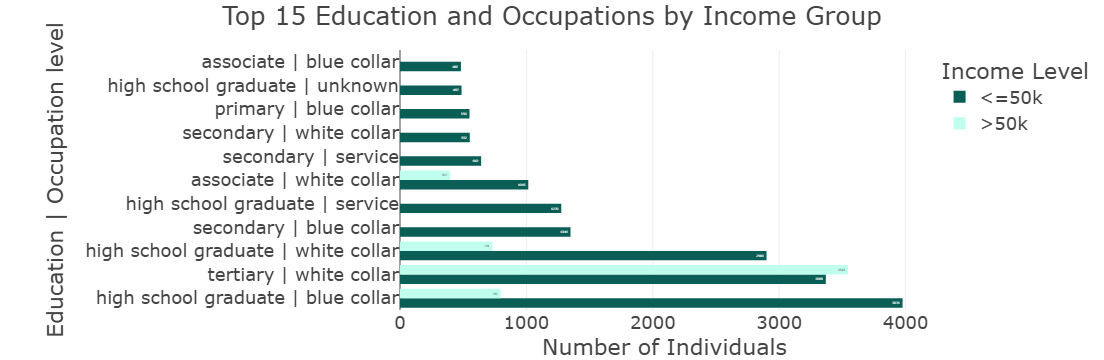

In [131]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)

fig = px.bar(
    adult_df_combos,
    x='total',
    y='edu_occ',
    color='income',
    orientation='h',
    title=f'Top {num} Education and Occupations by Income Group',
    barmode='group',
    color_discrete_sequence=['#0b5e55', '#c0ffee'],
    text='total'
)

fig.update_layout(
    template='presentation',
    xaxis_title='Number of Individuals',
    yaxis_title='Education | Occupation level',
    legend_title=dict(text='Income Level'),
    margin=dict(l=400, r=50, t=50, b=50),  # fixed typo here
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()
fig.write_image(os.path.join(results_dir, 'income level_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income level_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'income level_bar_chart.html'))
